# 第6章: 単語ベクトル

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して、以下の処理を行うプログラムを作成せよ。

In [1]:
!pwd

/content


## 50. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ、300次元）をダウンロードし、"United States"の単語ベクトルを表示せよ。ただし、"United States"は内部的には"United_States"と表現されていることに注意せよ。

In [1]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 459.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 878.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
import gensim.downloader as api

# Google Newsの学習済み単語ベクトルをダウンロード・ロード
wv = api.load('word2vec-google-news-300')

# "United_States" の単語ベクトルを表示
if "United_States" in wv:
    print(wv["United_States"])
else:
    print("単語 'United_States' はボキャブラリに含まれていません。")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2

## 51. 単語の類似度

"United States"と"U.S."のコサイン類似度を計算せよ。

In [2]:
import gensim.downloader as api
from gensim.models import KeyedVectors
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Google Newsの学習済み単語ベクトルをロード (すでにロード済みであればスキップ)
try:
    wv
except NameError:
    wv = api.load('word2vec-google-news-300')

# 単語が存在するか確認し、ベクトルを取得
if "United_States" in wv and "U.S." in wv:
    vector_us = wv["United_States"]
    vector_us_short = wv["U.S."]

    # コサイン類似度を計算 (scikit-learnを使用)
    similarity = cosine_similarity([vector_us], [vector_us_short])[0][0]
    print(f'"United States"と"U.S."のコサイン類似度: {similarity}')

else:
    print("指定された単語のいずれか、または両方がボキャブラリに含まれていません。")

"United States"と"U.S."のコサイン類似度: 0.7310774922370911


## 52. 類似度の高い単語10件

"United States"とコサイン類似度が高い10語と、その類似度を出力せよ。

In [3]:
import gensim.downloader as api
from gensim.models import KeyedVectors

# Google Newsの学習済み単語ベクトルをロード (すでにロード済みであればスキップ)
try:
    wv
except NameError:
    wv = api.load('word2vec-google-news-300')

# 単語が存在するか確認
if "United_States" in wv:
    # "United_States" との類似度が高い上位10語を取得
    similar_words = wv.most_similar("United_States", topn=10)

    print('"United States"とコサイン類似度が高い上位10語:')
    for word, similarity in similar_words:
        print(f'{word}: {similarity:.4f}')
else:
    print("単語 'United_States' はボキャブラリに含まれていません。")

"United States"とコサイン類似度が高い上位10語:
Unites_States: 0.7877
Untied_States: 0.7541
United_Sates: 0.7401
U.S.: 0.7311
theUnited_States: 0.6404
America: 0.6178
UnitedStates: 0.6167
Europe: 0.6133
countries: 0.6045
Canada: 0.6019


## 53. 加法構成性によるアナロジー

"Spain"の単語ベクトルから"Madrid"のベクトルを引き、"Athens"のベクトルを足したベクトルを計算し、そのベクトルと類似度の高い10語とその類似度を出力せよ。

In [4]:
import gensim.downloader as api
from gensim.models import KeyedVectors
import numpy as np

# Google Newsの学習済み単語ベクトルをロード (すでにロード済みであればスキップ)
try:
    wv
except NameError:
    wv = api.load('word2vec-google-news-300')

# 関連する単語がボキャブラリに存在するか確認
if "Spain" in wv and "Madrid" in wv and "Athens" in wv:
    # ベクトルの演算: Spain - Madrid + Athens
    vector_result = wv["Spain"] - wv["Madrid"] + wv["Athens"]

    # 結果ベクトルと類似度が高い上位10語を取得
    similar_words = wv.most_similar(positive=[vector_result], topn=10)

    print('"Spain" - "Madrid" + "Athens" のベクトルとコサイン類似度が高い上位10語:')
    for word, similarity in similar_words:
        print(f'{word}: {similarity:.4f}')
else:
    print("指定された単語の一部、または全てがボキャブラリに含まれていません。")

"Spain" - "Madrid" + "Athens" のベクトルとコサイン類似度が高い上位10語:
Athens: 0.7528
Greece: 0.6685
Aristeidis_Grigoriadis: 0.5496
Ioannis_Drymonakos: 0.5361
Greeks: 0.5352
Ioannis_Christou: 0.5330
Hrysopiyi_Devetzi: 0.5088
Iraklion: 0.5059
Greek: 0.5041
Athens_Greece: 0.5034


## 54. アナロジーデータでの実験

[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし、国と首都に関する事例（`: capital-common-countries`セクション）に対して、vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し、そのベクトルと類似度が最も高い単語と、その類似度を求めよ。求めた単語と類似度は、各事例と一緒に記録せよ。

In [13]:
import gensim.downloader as api
from gensim.models import KeyedVectors
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Google Newsの学習済み単語ベクトルをロード (まだロードしていない場合)
try:
    wv
except NameError:
    wv = api.load('word2vec-google-news-300')

# 添付のファイルからデータを読み込む
analogy_data = []
with open('capital-common-countries.txt', 'r', encoding='utf-8') as f:
    analogy_data = f.readlines()

# 結果を格納するリスト
results = []

# 'capital-common-countries' セクションの開始行を探す
start_index = -1
for i, line in enumerate(analogy_data):
    if line.startswith(': capital-common-countries'):
        start_index = i + 1
        break

if start_index != -1:
    # 'capital-common-countries' セクションを処理
    for line in analogy_data[start_index:]:
        if line.startswith(':'):  # 次のセクションの開始
            break
        parts = line.strip().split()
        if len(parts) == 4:
            word1, word2, word3, expected_word = parts

            # 単語が存在するか確認
            if word1 in wv and word2 in wv and word3 in wv:
                # ベクトル演算
                vector_result = wv[word2] - wv[word1] + wv[word3]

                # 結果ベクトルと類似度が高い単語を求める
                similar_word, similarity = wv.most_similar(positive=[vector_result], topn=1)[0]

                results.append({
                    'word1': word1,
                    'word2': word2,
                    'word3': word3,
                    'expected': expected_word,
                    'predicted': similar_word,
                    'similarity': f'{similarity:.4f}'
                })
            else:
                 results.append({
                    'word1': word1,
                    'word2': word2,
                    'word3': word3,
                    'expected': expected_word,
                    'predicted': '存在しない単語',
                    'similarity': 'N/A'
                })

    # 結果を出力
    print("国と首都に関する単語アナロジーの結果:")
    for result in results:
        print(f"{result['word1']} -> {result['word2']}, {result['word3']} -> {result['predicted']} ({result['similarity']}) (Expected: {result['expected']})")

else:
    print("'capital-common-countries' セクションが見つかりませんでした。")

国と首都に関する単語アナロジーの結果:
Athens -> Greece, Baghdad -> Baghdad (0.7490) (Expected: Iraq)
Athens -> Greece, Bangkok -> Bangkok (0.7431) (Expected: Thailand)
Athens -> Greece, Beijing -> China (0.7187) (Expected: China)
Athens -> Greece, Berlin -> Germany (0.6721) (Expected: Germany)
Athens -> Greece, Bern -> Bern (0.6902) (Expected: Switzerland)
Athens -> Greece, Cairo -> Egypt (0.7627) (Expected: Egypt)
Athens -> Greece, Canberra -> Canberra (0.7407) (Expected: Australia)
Athens -> Greece, Hanoi -> Hanoi (0.7510) (Expected: Vietnam)
Athens -> Greece, Havana -> Havana (0.7263) (Expected: Cuba)
Athens -> Greece, Helsinki -> Helsinki (0.7235) (Expected: Finland)
Athens -> Greece, Islamabad -> Islamabad (0.7821) (Expected: Pakistan)
Athens -> Greece, Kabul -> Kabul (0.7715) (Expected: Afghanistan)
Athens -> Greece, London -> London (0.5891) (Expected: England)
Athens -> Greece, Madrid -> Spain (0.7146) (Expected: Spain)
Athens -> Greece, Moscow -> Russia (0.7456) (Expected: Russia)
Athens -> Gre

## 55. アナロジータスクでの正解率

54の実行結果を用い、意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ。

In [14]:
# 結果を出力
correct_count = 0
total_count = len(results)
for result in results:
    if result['expected'] == result['predicted']:
        correct_count += 1

accuracy = correct_count / total_count * 100
print(f"意味的アナロジー正解率: {accuracy:.2f}%")

意味的アナロジー正解率: 35.38%


## 56. WordSimilarity-353での評価

[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし、単語ベクトルにより計算される類似度のランキングと、人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ。

In [33]:
import pandas as pd
from scipy.stats import spearmanr

# データの読み込み
df = pd.read_csv("combined.csv")

score = []
human_score = []

for _, row in df.iterrows():
    w1, w2 = row['Word 1'], row['Word 2']
    if w1 in wv and w2 in wv:
        sim = wv.similarity(w1, w2)
        score.append(sim)
        human_score.append(row['Human (mean)'])

# スピアマン相関係数の計算
rho, _ = spearmanr(human_score, score)
print(f"スピアマン相関係数: {rho}")


スピアマン相関係数: 0.7000166486272194


## 57. k-meansクラスタリング

国名に関する単語ベクトルを抽出し、k-meansクラスタリングをクラスタ数k=5として実行せよ。

In [17]:
with open('capital-common-countries.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

country_set = set()  # 重複を避けるために set を使用
in_section = False
section_name = ': capital-common-countries'

for line in lines:
    line = line.strip()

    if line.startswith(':'):
        if line == section_name:
            in_section = True
            continue
        elif in_section:
            break
        else:
            continue

    if in_section:
        parts = line.split()
        if len(parts) != 4:
            continue
        _, country1, _, country2 = parts  # word2, word4 が国名
        country_set.add(country1)
        country_set.add(country2)

country_list = list(country_set)
country_list.sort()

country_list

['Afghanistan',
 'Australia',
 'Canada',
 'China',
 'Cuba',
 'Egypt',
 'England',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iran',
 'Iraq',
 'Italy',
 'Japan',
 'Norway',
 'Pakistan',
 'Russia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Vietnam']

In [23]:
from sklearn.cluster import KMeans
import numpy as np


# 国名リストからベクトルを取得
country_vectors = []
for country in country_list:
    if country in wv:  # モデルに単語が含まれている場合のみ
        country_vectors.append(wv[country])
    else:
        # モデルに国名がない場合は、適当な処理（例えば、ゼロベクトルにするなど）を追加
        country_vectors.append(np.zeros(wv.vector_size))

# numpy配列に変換
country_vectors = np.array(country_vectors)

# K-meansクラスタリングを実行（クラスタ数 k=5）
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans.fit(country_vectors)

# 結果を表示
labels = kmeans.labels_

# 各クラスタに所属する国を表示
clusters = {i: [] for i in range(5)}
for idx, label in enumerate(labels):
    clusters[label].append(country_list[idx])

# クラスタごとの国名を表示
for cluster, countries in clusters.items():
    print(f"Cluster {cluster}: {countries}")

Cluster 0: ['Greece']
Cluster 1: ['Australia', 'China', 'England', 'France', 'Germany', 'Italy', 'Japan', 'Russia', 'Spain', 'Switzerland', 'Vietnam']
Cluster 2: ['Cuba']
Cluster 3: ['Afghanistan', 'Egypt', 'Iran', 'Iraq', 'Pakistan', 'Thailand']
Cluster 4: ['Canada', 'Finland', 'Norway', 'Sweden']


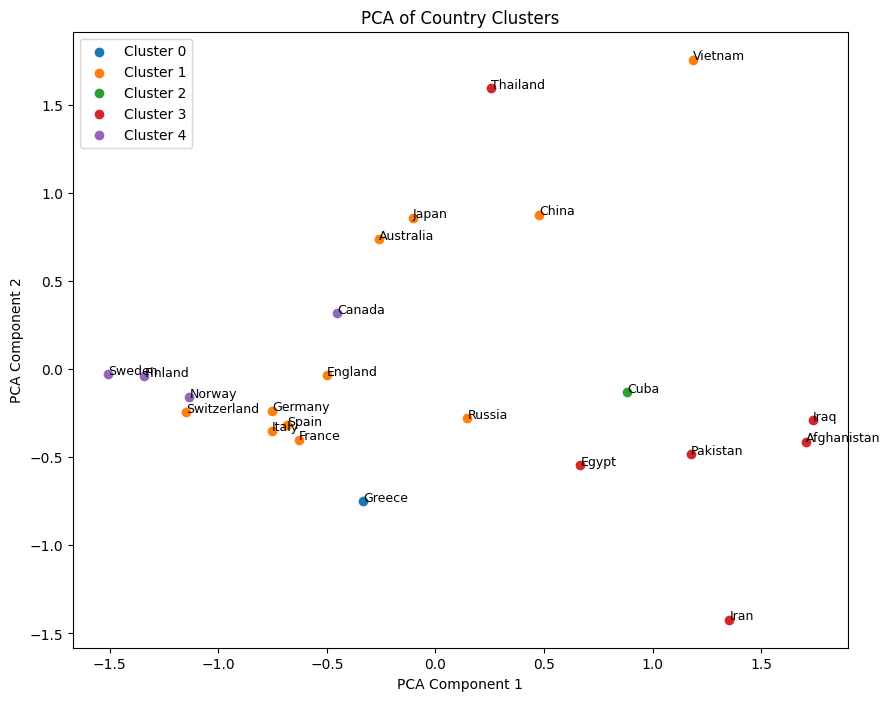

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# PCAで次元を削減（2次元に）
pca = PCA(n_components=2)
country_vectors_2d = pca.fit_transform(country_vectors)

# K-meansクラスタリング（クラスタ数 k=5）
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans.fit(country_vectors)

# 結果を表示
labels = kmeans.labels_

# クラスタごとに色をつけてプロット
plt.figure(figsize=(10, 8))

# 各クラスタを異なる色で表示
for cluster in range(5):
    cluster_points = country_vectors_2d[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

# 国名ラベルを表示（オプション）
for i, country in enumerate(country_list):
    plt.text(country_vectors_2d[i, 0], country_vectors_2d[i, 1], country, fontsize=9)

# グラフのタイトルとラベル
plt.title('PCA of Country Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# クラスタの凡例
plt.legend()

# プロットを表示
plt.show()


## 58. Ward法によるクラスタリング

国名に関する単語ベクトルに対し、Ward法による階層型クラスタリングを実行せよ。さらに、クラスタリング結果をデンドログラムとして可視化せよ。

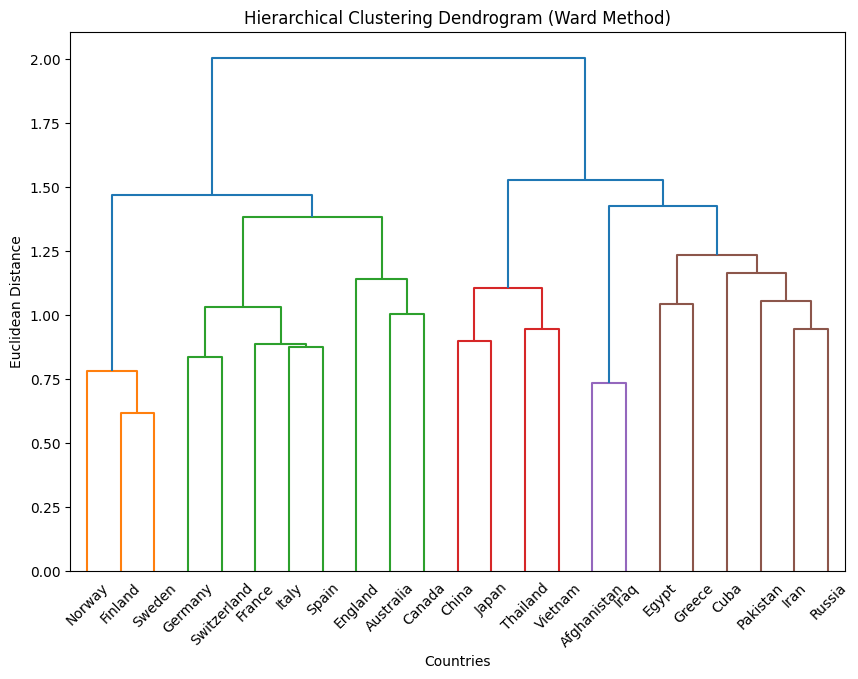

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize

# 国名リストからベクトルを取得
country_vectors = []
for country in country_list:
    if country in wv:  # モデルに単語が含まれている場合のみ
        country_vectors.append(wv[country])
    else:
        # モデルに国名がない場合は、適当な処理（例えば、ゼロベクトルにするなど）を追加
        country_vectors.append(np.zeros(wv.vector_size))

# numpy配列に変換
country_vectors = np.array(country_vectors)

# ベクトルを正規化（任意）
country_vectors_normalized = normalize(country_vectors)

# Ward法による階層型クラスタリング
linked = linkage(country_vectors_normalized, method='ward')

# デンドログラムをプロット
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=country_list, orientation='top', distance_sort='ascending', show_leaf_counts=True)

# タイトルとラベル
plt.title('Hierarchical Clustering Dendrogram (Ward Method)')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance')

# プロットを表示
plt.show()

## 59. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ。

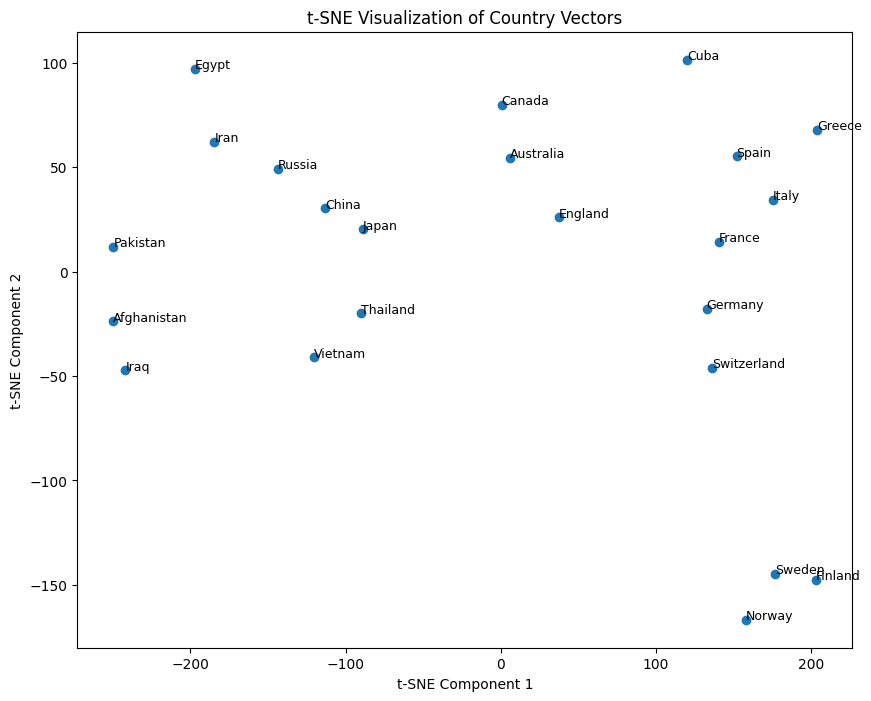

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 国名リストからベクトルを取得
country_vectors = []
for country in country_list:
    if country in wv:  # モデルに単語が含まれている場合のみ
        country_vectors.append(wv[country])
    else:
        # モデルに国名がない場合は、適当な処理（例えば、ゼロベクトルにするなど）を追加
        country_vectors.append(np.zeros(wv.vector_size))

# numpy配列に変換
country_vectors = np.array(country_vectors)

# t-SNEによる次元削減（2次元に圧縮）
tsne = TSNE(n_components=2, perplexity=3, random_state=2)
country_vectors_2d = tsne.fit_transform(country_vectors)

# 可視化
plt.figure(figsize=(10, 8))
plt.scatter(country_vectors_2d[:, 0], country_vectors_2d[:, 1])

# 各点に国名をラベルとして表示
for i, country in enumerate(country_list):
    plt.text(country_vectors_2d[i, 0], country_vectors_2d[i, 1], country, fontsize=9)

# タイトルと軸ラベル
plt.title('t-SNE Visualization of Country Vectors')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# プロットを表示
plt.show()